In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import sklearn.metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

In [4]:
df=pd.read_csv('drive/MyDrive/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [6]:
df['Gender']=np.where(df['Gender']=='Male', 1,0)

In [7]:
X=df.drop(['CustomerID'],axis=1)

In [8]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


----------------------------------------------------------------------
PCA
----------------------------------------------------------------------

In [ ]:
pca=PCA(n_components=2)
pca_result=pca.fit_transform(X_std)

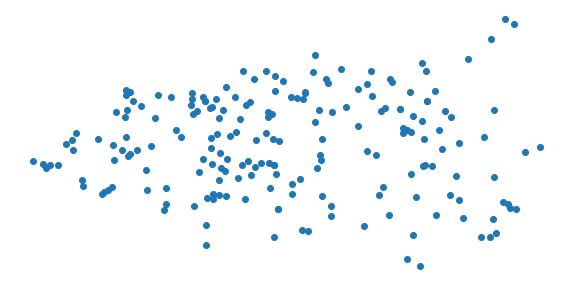

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(pca_result[:,0],pca_result[:,1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

----------------------------------------------------------------------
UMAP
----------------------------------------------------------------------

In [44]:
! pip install umap-learn

     |████████████████████████████████| 80 kB 4.0 MB/s 
     |████████████████████████████████| 1.1 MB 11.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=01b56849493bd84d0478c7257262bd3b2ca4d259420ebf122f193c3d3c3377ff
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=ea2eb9422e39bd77a58dc29d416c7be4f5ac1d9d01ad4e9477a336ea76310795
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent


In [45]:
import umap

In [ ]:
umap_result=umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation').fit_transform(X)

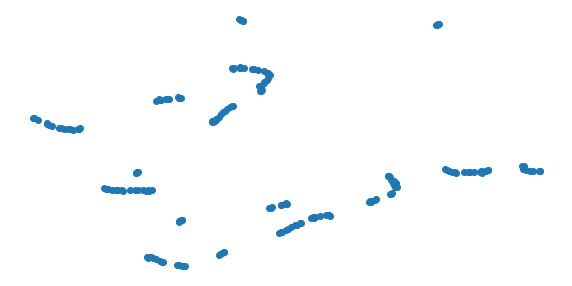

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_result[:,0],umap_result[:,1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

----------------------------------------------------------------------
TSNE
----------------------------------------------------------------------

In [ ]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2,n_iter=300)
tsne_result=tsne.fit_transform(X)

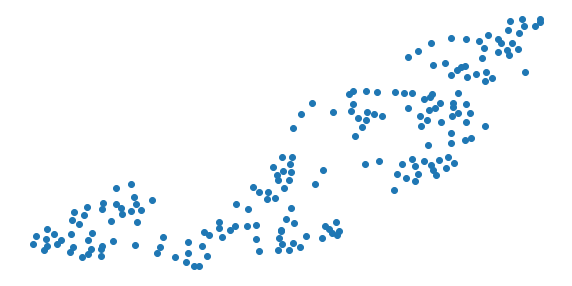

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_result[:,0],tsne_result[:,1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

----------------------------------------------------------------------
KMeans
----------------------------------------------------------------------

In [49]:
# Defining the k-means
kmeans = KMeans(n_clusters=5,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)

# Fit model
result= kmeans.fit_transform(X_std)
y_pred = kmeans.fit_predict(X_std)

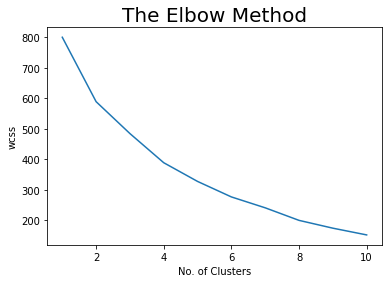

In [32]:
#Elbow method to find number of clusters
w=[]
for i in range (1,11):
  kmeans = KMeans(n_clusters=i,init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
  kmeans.fit(X_std)
  w.append(kmeans.inertia_)
plt.plot(range(1,11),w)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()


In [29]:
range(11)

range(0, 11)

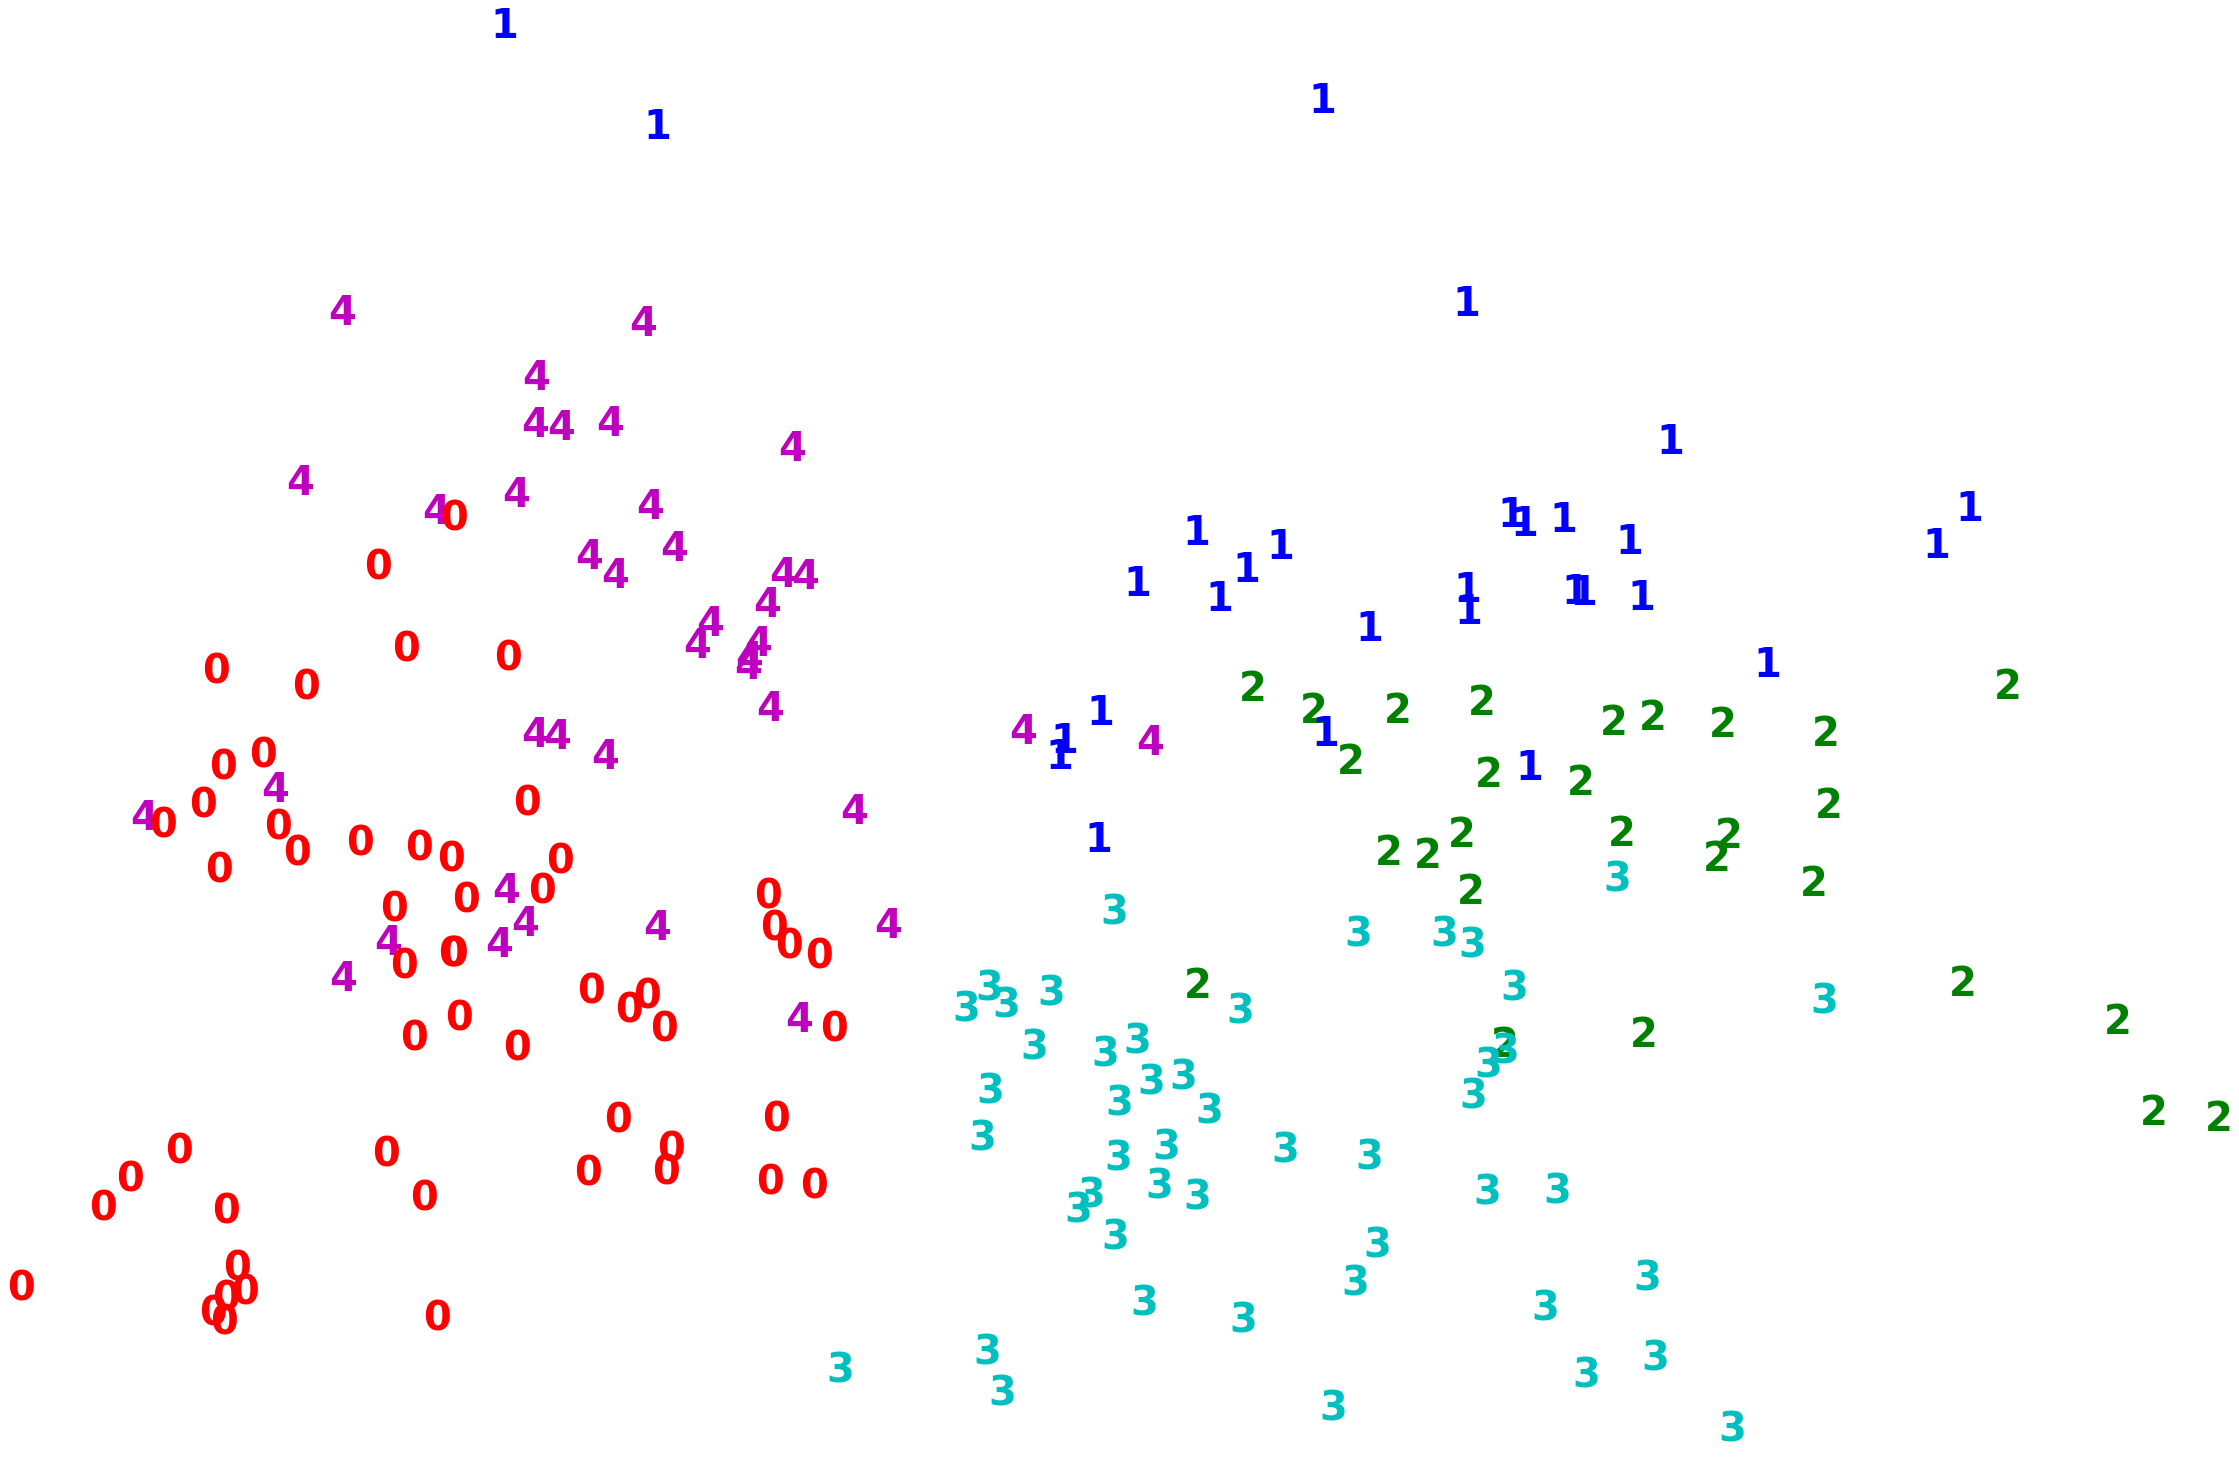

In [50]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(8,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y_pred[i]],
             fontdict={'weight': 'bold', 'size': 40}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [57]:
from sklearn import metrics
metrics.silhouette_score(X_std,y_pred,metric='euclidean')

0.31437614343154285

----------------------------------------------------------------------
Hirarchical
----------------------------------------------------------------------

In [9]:
agg_cluster=AgglomerativeClustering(n_clusters=5,affinity='cosine',linkage='complete')
cluster=agg_cluster.fit_predict(X_std)

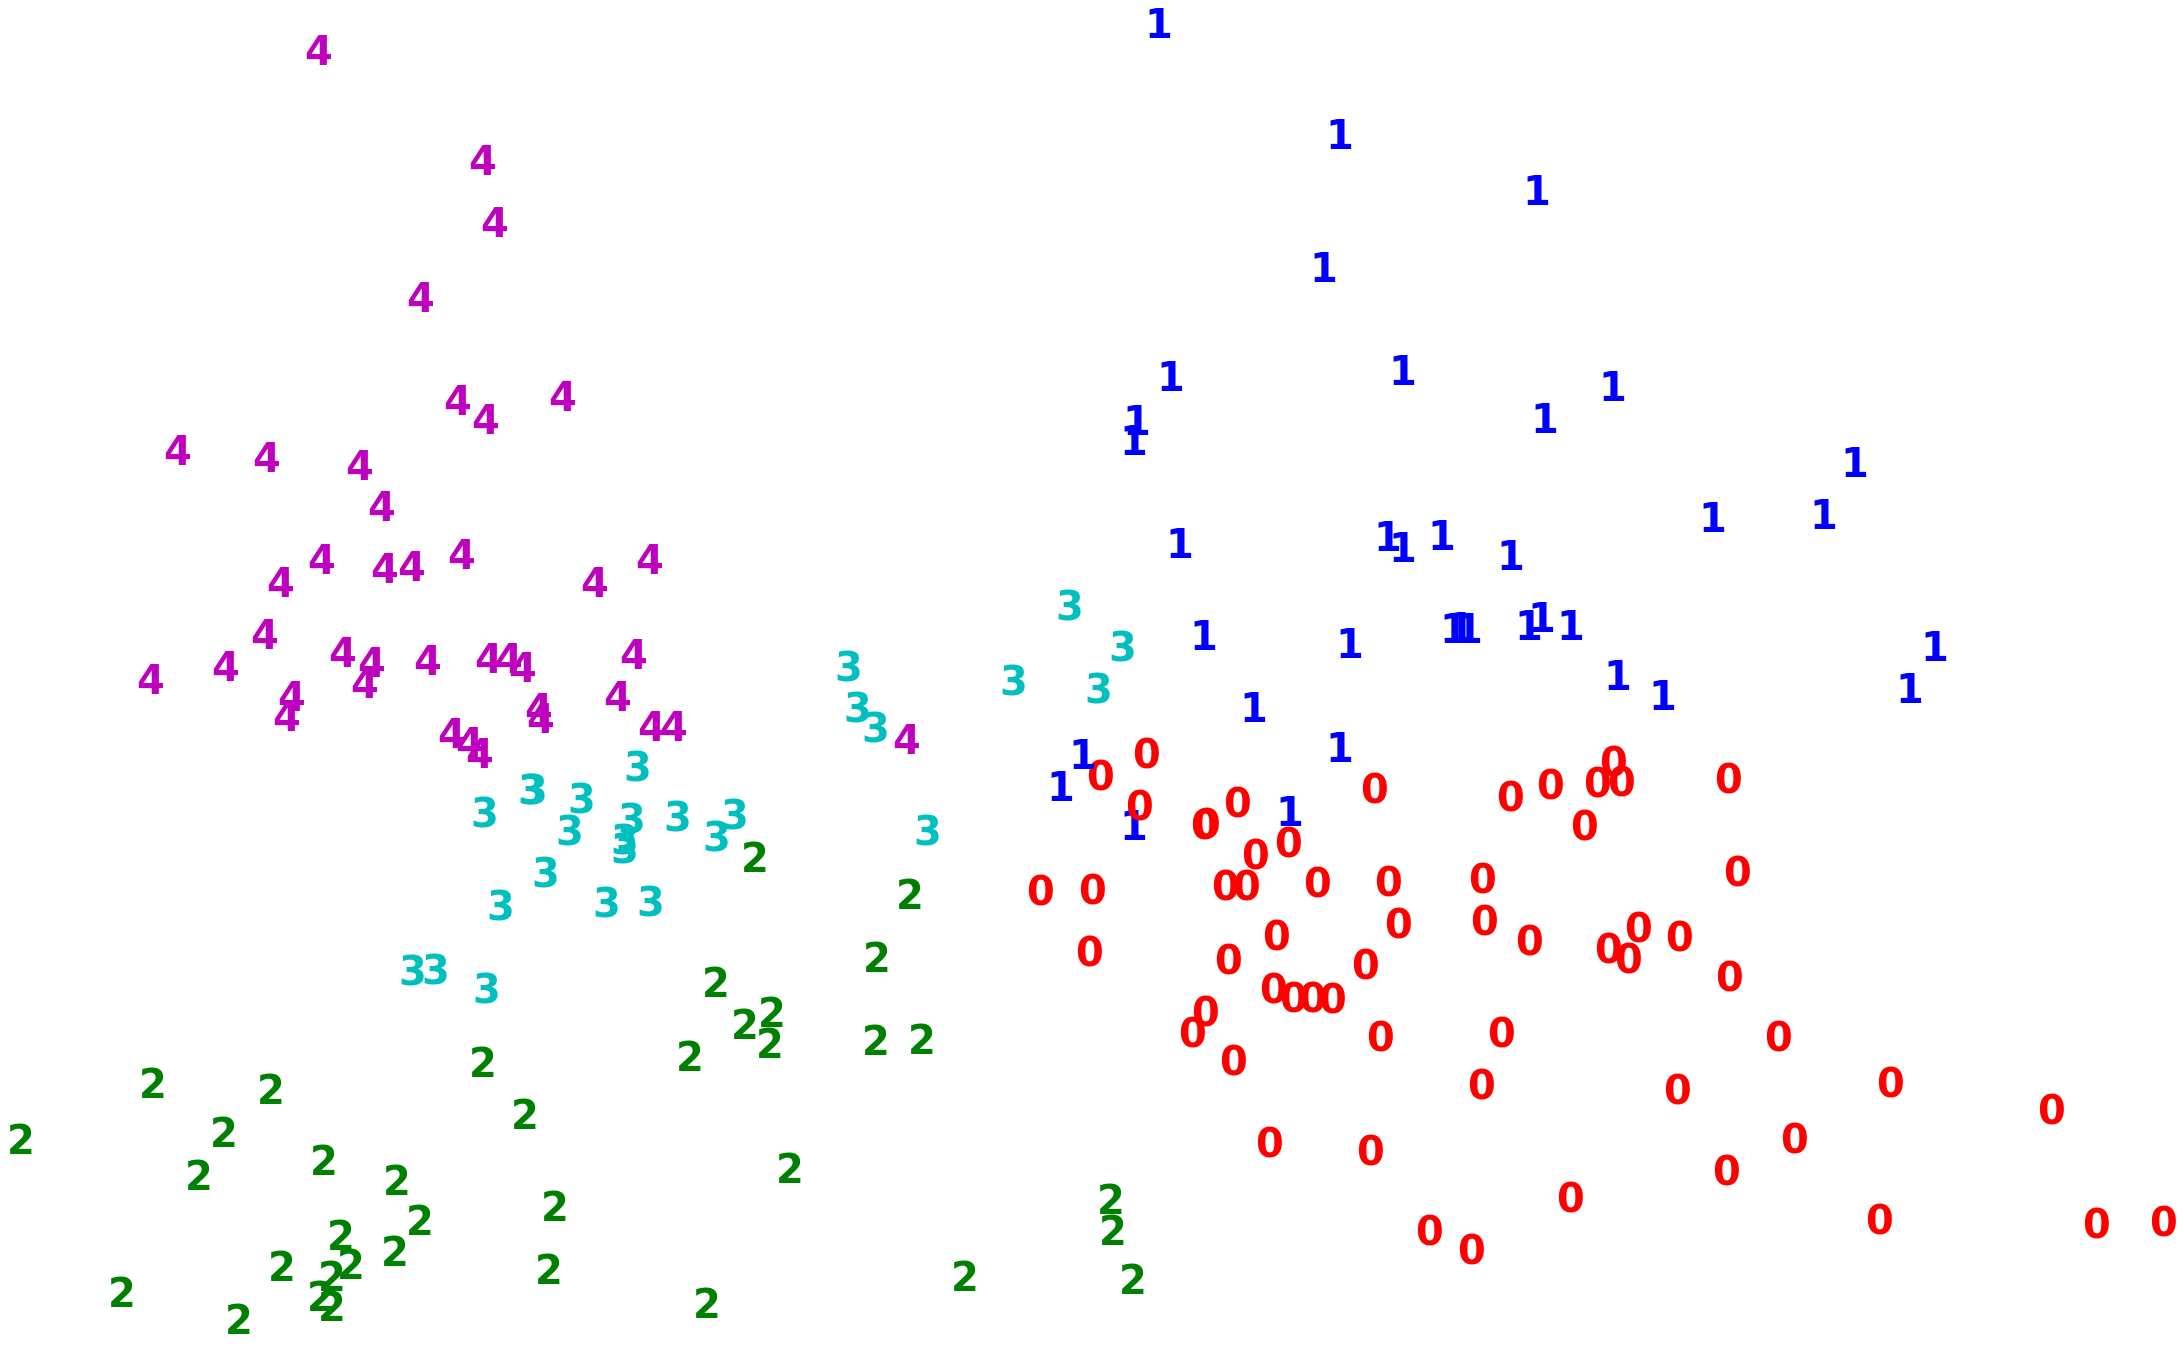

In [11]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(8,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(cluster[i]),
             color=colours[cluster[i]],
             fontdict={'weight': 'bold', 'size': 40}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

----------------------------------------------------------------------
DBSCAN
----------------------------------------------------------------------

In [30]:
dbscan=DBSCAN(eps=0.5,min_samples=7)
cluster=dbscan.fit_predict(X_std)

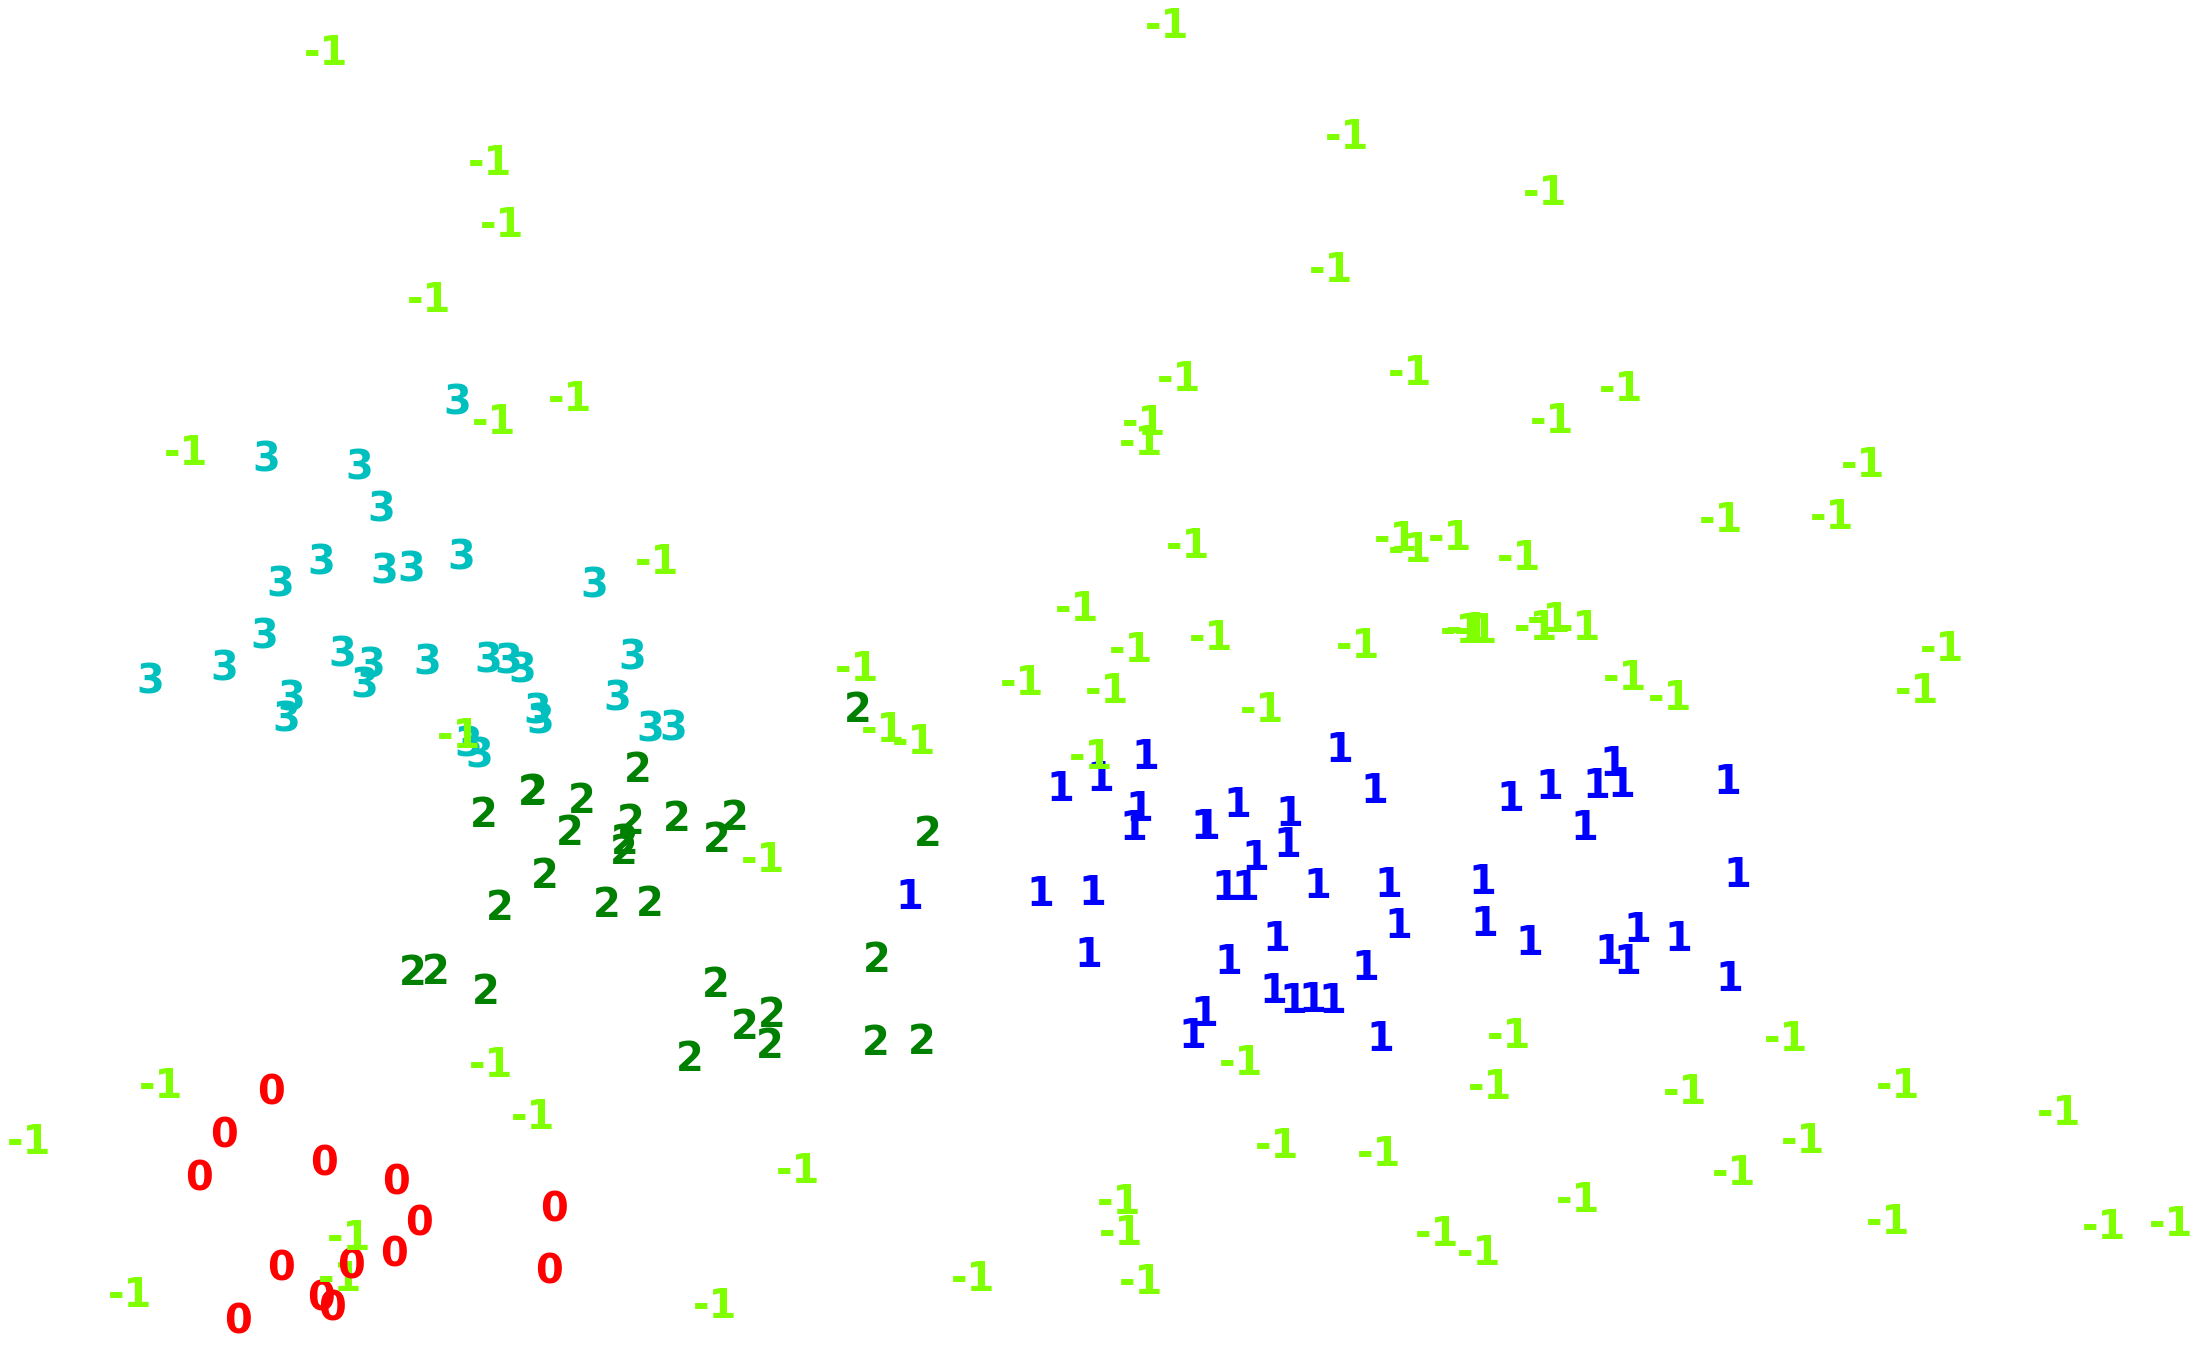

In [31]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(8,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(cluster[i]),
             color=colours[cluster[i]],
             fontdict={'weight': 'bold', 'size': 40}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

----------------------------------------------------------------------
GMM
----------------------------------------------------------------------

In [57]:
gmm=GaussianMixture(n_components=5)
gmm_cluster=gmm.fit_predict(X_std)

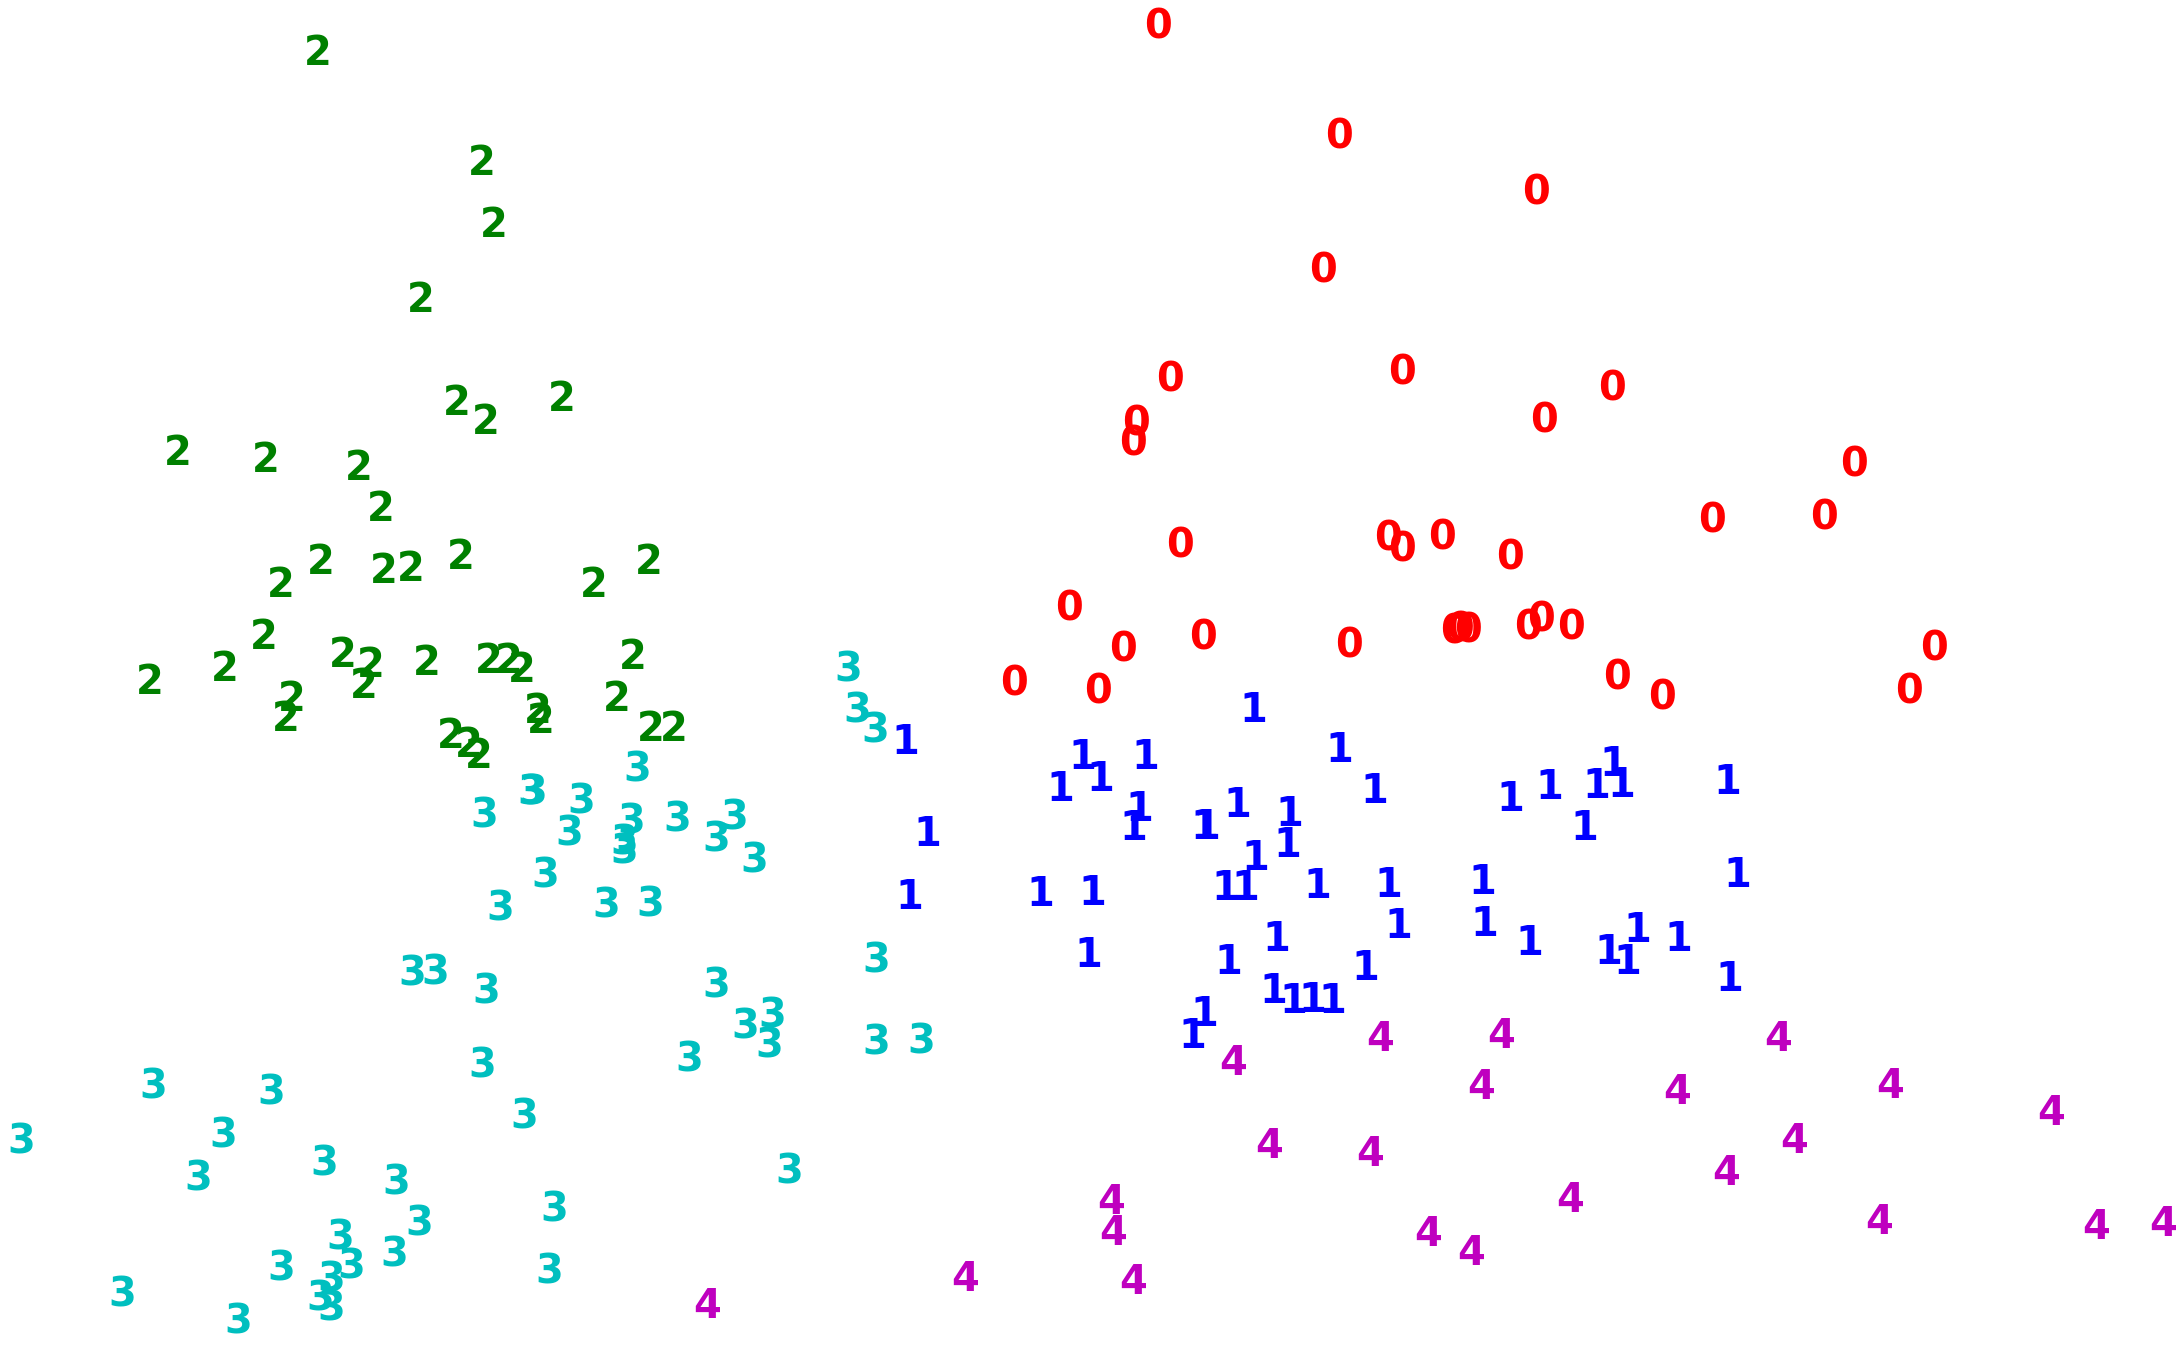

In [58]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(8,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(gmm_cluster[i]),
             color=colours[gmm_cluster[i]],
             fontdict={'weight': 'bold', 'size': 40}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

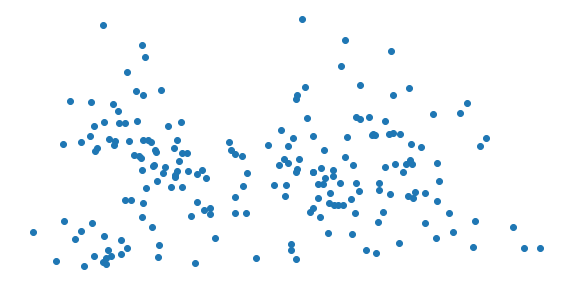

In [61]:
plt.figure(figsize=(10,5))
plt.scatter(pca[:, 0], pca[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [46]:
umap_result=umap.UMAP(n_neighbors=5,min_dist=0.3,metric='correlation').fit_transform(X_std)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [55]:

plt.figure(figsize=(8,5))
colours = ["r","b","g","c","m","y","k","r","burlywood","chartreuse"]
for i in range(umap_result.shape[0]):
    plt.text(umap_result[i, 0], umap_result[i, 1], str(gmm_cluster[i]),
             color=colours[gmm_cluster[i]],
             fontdict={'weight': 'bold', 'size': 40}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

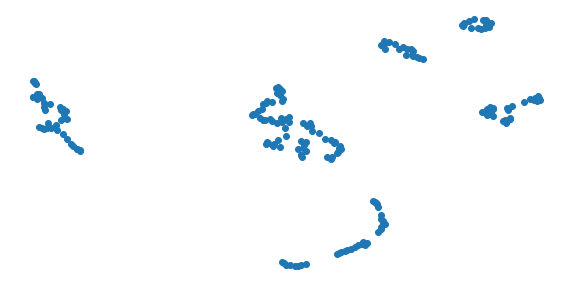

In [56]:
plt.figure(figsize=(10,5))
plt.scatter(umap_result[:, 0], umap_result[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Different digits are separated quite well, better than pca. UMAP captures the global structure of the data better. If you compare this graph with the graph that was plotted using pca, you'll see how well different digits are placed distant from each other.
You can also observe that the data points of the same digits seem to be clustered together as they are in the pca . 



Comparing 4 clustering algorithms KMeans,Hierarchical clustering, DBSCAN and GMM, shows better result using Gaussian mixture model.